In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\padal\OneDrive\Desktop\Data Science\market.csv")
df

,Region,Product,Subsidiary,Stores,Sales,Inventory,Returns
0,Africa,Boot,Addis Ababa,12,29761,191821,769
1,Africa,Men's Casual,Addis Ababa,4,67242,118036,2284
2,Africa,Men's Dress,Addis Ababa,7,76793,136273,2433
3,Africa,Sandal,Addis Ababa,10,62819,204284,1861
4,Africa,Slipper,Addis Ababa,14,68641,279795,1771
...,...,...,...,...,...,...,...
385,Western Europe,Sandal,Rome,3,1249,4611,48
386,Western Europe,Slipper,Rome,13,42442,132283,1829
387,Western Europe,Sport Shoe,Rome,14,9969,74848,549
388,Western Europe,Women's Casual,Rome,2,19964,62256,954


In [2]:
df["Region"].value_counts()

Western Europe               62
Africa                       56
South America                54
Pacific                      45
United States                40
Canada                       34
Central America/Caribbean    31
Eastern Europe               31
Middle East                  23
Asia                         14
Name: Region, dtype: int64

In [3]:
t1 = df.groupby("Region")["Sales"].sum()
t1

Region
Africa                       2342588
Asia                          460231
Canada                       2041054
Central America/Caribbean    3081641
Eastern Europe               2394940
Middle East                  4333062
Pacific                      2296794
South America                2434783
United States                5503986
Western Europe               4873000
Name: Sales, dtype: int64

<AxesSubplot:xlabel='Region'>

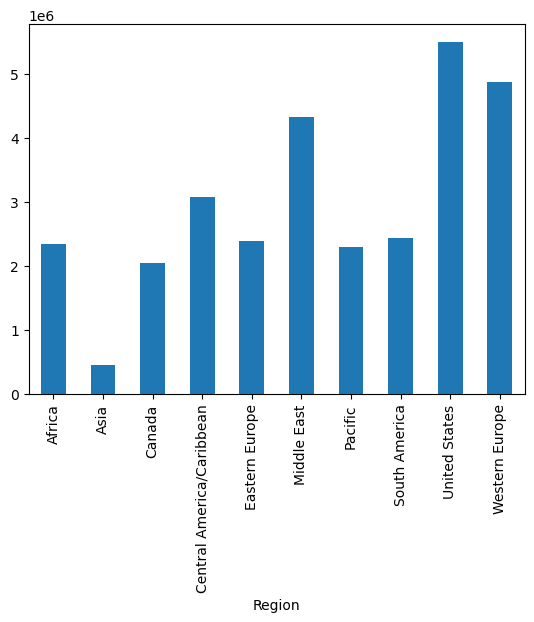

In [4]:
t1.plot(kind="bar")

In [5]:
t2 = df.groupby("Product")["Returns"].sum()
t2

Product
Boot               98622
Men's Casual      233668
Men's Dress       147266
Sandal             38170
Slipper           188693
Sport Shoe         25179
Women's Casual    131394
Women's Dress     174275
Name: Returns, dtype: int64

<AxesSubplot:xlabel='Product'>

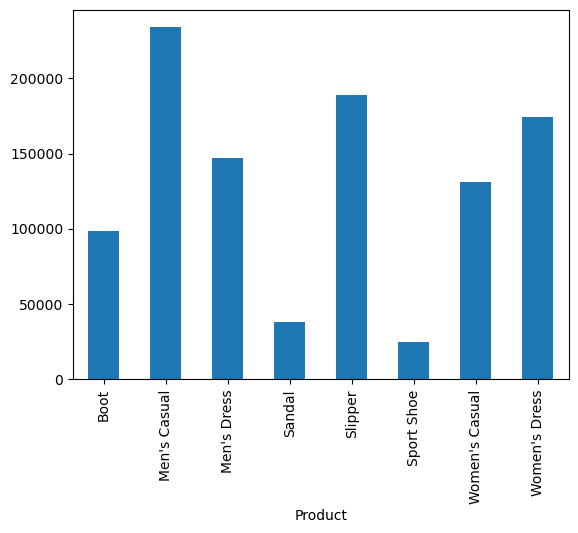

In [27]:
t2.plot(kind="bar")

<AxesSubplot:ylabel='Returns'>

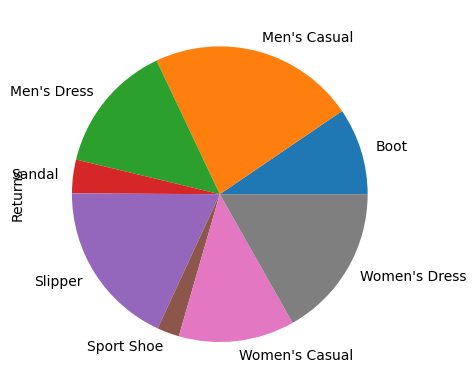

In [28]:
t2.plot(kind="pie")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Region      390 non-null    object
 1   Product     390 non-null    object
 2   Subsidiary  390 non-null    object
 3   Stores      390 non-null    int64 
 4   Sales       390 non-null    int64 
 5   Inventory   390 non-null    int64 
 6   Returns     390 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.5+ KB


Sales: 2.0375602944117115


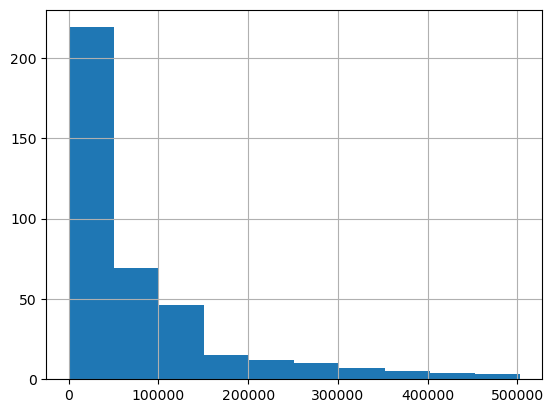

In [35]:
df["Sales"].hist()
print("Sales:", df["Sales"].skew())

Inventory: 1.9258874289437535


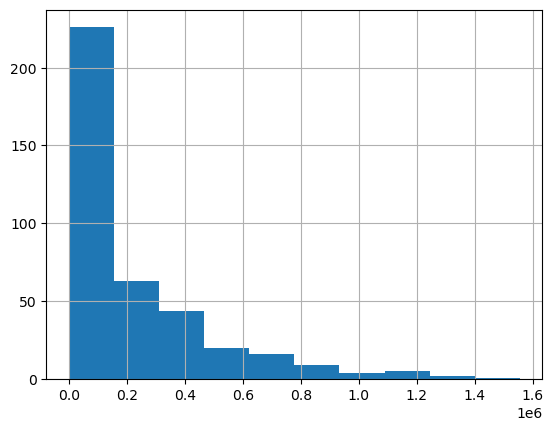

In [36]:
df["Inventory"].hist()
print("Inventory:", df["Inventory"].skew())

<AxesSubplot:title={'center':'Boxplot'}>

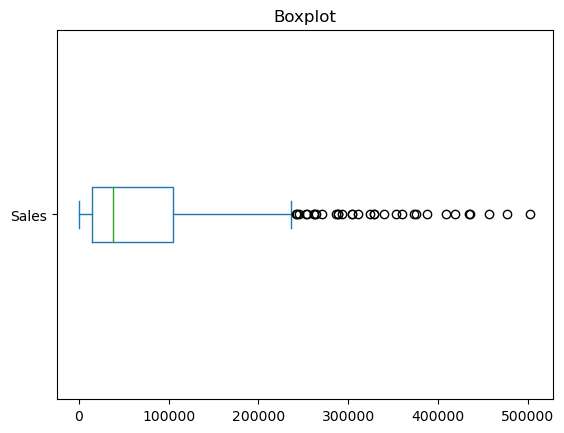

In [38]:
boxplot = df["Sales"].plot(kind="box",vert=False,title="Boxplot")
boxplot

<AxesSubplot:title={'center':'Boxplot'}>

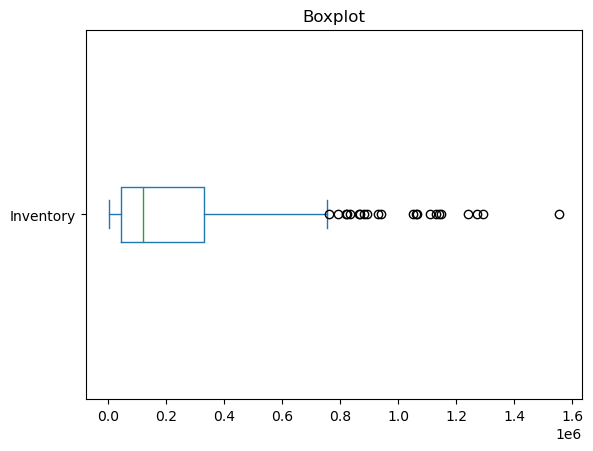

In [41]:
boxplot1 = df["Inventory"].plot(kind="box",vert=False,title="Boxplot")
boxplot1

<AxesSubplot:title={'center':'Boxplot'}>

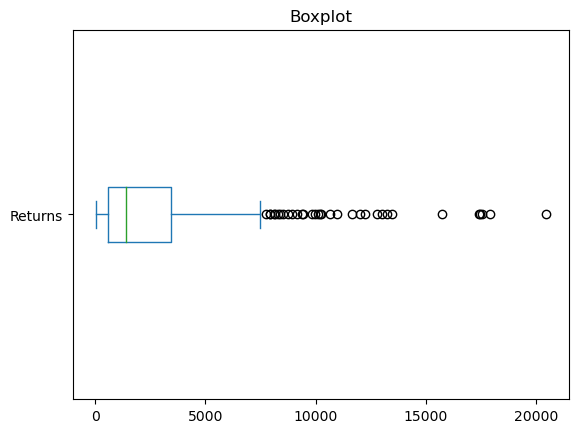

In [42]:
boxplot2 = df["Returns"].plot(kind="box",vert=False,title="Boxplot")
boxplot2

In [43]:
df.head()

,Region,Product,Subsidiary,Stores,Sales,Inventory,Returns
0,Africa,Boot,Addis Ababa,12,29761,191821,769
1,Africa,Men's Casual,Addis Ababa,4,67242,118036,2284
2,Africa,Men's Dress,Addis Ababa,7,76793,136273,2433
3,Africa,Sandal,Addis Ababa,10,62819,204284,1861
4,Africa,Slipper,Addis Ababa,14,68641,279795,1771


In [48]:
import numpy as np
Q1 = np.percentile(df["Inventory"],25)
Q3 = np.percentile(df["Inventory"],75)
IQR = Q3-Q1
IQR

285451.75

In [49]:
UW = (IQR * 1.5)+Q3
UW

756269.875

In [53]:
print("No of ouliers are:",len(df[df["Inventory"] > UW]))

No of ouliers are: 22


In [54]:
df["Inventory"]>UW

0      False
1      False
2      False
3      False
4      False
       ...  
385    False
386    False
387    False
388    False
389    False
Name: Inventory, Length: 390, dtype: bool

In [55]:
df[df["Inventory"]>UW]

,Region,Product,Subsidiary,Stores,Sales,Inventory,Returns
16,Africa,Men's Casual,Cairo,25,360209,1063251,9424
21,Africa,Women's Casual,Cairo,14,328474,940851,10124
99,Canada,Boot,Vancouver,31,286497,882080,9160
107,Central America/Caribbean,Slipper,Kingston,37,476638,1555357,15713
110,Central America/Caribbean,Women's Dress,Kingston,41,375817,1147300,11656
175,Middle East,Men's Casual,Dubai,29,419336,868115,17552
178,Middle East,Slipper,Dubai,17,387680,1238698,12768
181,Middle East,Women's Dress,Dubai,19,435891,1292400,12999
187,Middle East,Women's Casual,Tel Aviv,19,288904,790386,12000
188,Middle East,Women's Dress,Tel Aviv,18,434496,1272531,17394


In [59]:
#Replacing the outlier values with nearest whisker length
df["Inventory"][df["Inventory"]>UW] = UW

In [60]:
df["Inventory"].describe()

count       390.000000
mean     211213.933974
std      222586.028429
min         374.000000
25%       42640.500000
50%      118149.000000
75%      328092.250000
max      756269.875000
Name: Inventory, dtype: float64

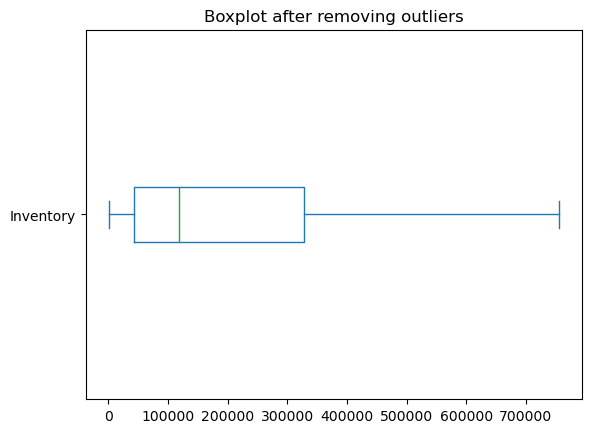

In [61]:
boxplot = df["Inventory"].plot(kind="box",vert=False,title="Boxplot after removing outliers")

In [3]:
df.head()

,Region,Product,Subsidiary,Stores,Sales,Inventory,Returns
0,Africa,Boot,Addis Ababa,12,29761,191821,769
1,Africa,Men's Casual,Addis Ababa,4,67242,118036,2284
2,Africa,Men's Dress,Addis Ababa,7,76793,136273,2433
3,Africa,Sandal,Addis Ababa,10,62819,204284,1861
4,Africa,Slipper,Addis Ababa,14,68641,279795,1771


In [7]:
import numpy as np

Q1 = np.percentile(df["Sales"],25)
Q3 = np.percentile(df["Sales"],75)
IQR = Q3 - Q1
print(IQR)

89220.25


In [8]:
UW = (IQR*1.5) + Q3
UW

238175.125

In [9]:
df["Sales"]>UW

0      False
1      False
2      False
3      False
4      False
       ...  
385    False
386    False
387    False
388    False
389    False
Name: Sales, Length: 390, dtype: bool

In [10]:
df[df["Sales"]>UW]

,Region,Product,Subsidiary,Stores,Sales,Inventory,Returns
16,Africa,Men's Casual,Cairo,25,360209,1063251,9424
21,Africa,Women's Casual,Cairo,14,328474,940851,10124
99,Canada,Boot,Vancouver,31,286497,882080,9160
100,Canada,Men's Casual,Vancouver,25,353361,671837,20470
103,Canada,Women's Casual,Vancouver,20,304106,665323,8278
105,Central America/Caribbean,Men's Dress,Kingston,23,270863,618703,7447
107,Central America/Caribbean,Slipper,Kingston,37,476638,1555357,15713
110,Central America/Caribbean,Women's Dress,Kingston,41,375817,1147300,11656
159,Eastern Europe,Men's Casual,Warsaw,15,304093,729044,9364
167,Middle East,Men's Casual,Al-Khobar,24,340201,616745,13251


In [14]:
print("No of outliers in are:", len(df[df["Sales"]>UW]))

No of outliers in are: 32


In [15]:
df["Sales"].describe()

count       390.000000
mean      76313.023077
std       95418.194363
min         325.000000
25%       15124.500000
50%       38005.500000
75%      104344.750000
max      502636.000000
Name: Sales, dtype: float64

In [18]:
#Replacing the outlier values with nearest whisker length
df["Sales"][df["Sales"]>UW] = UW

C:\Users\padal\AppData\Local\Temp\ipykernel_25308\964141398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales"][df["Sales"]>UW] = UW


In [19]:
df["Sales"].describe()

count       390.000000
mean      68469.697436
std       72825.238554
min         325.000000
25%       15124.500000
50%       38005.500000
75%      104344.750000
max      238175.125000
Name: Sales, dtype: float64

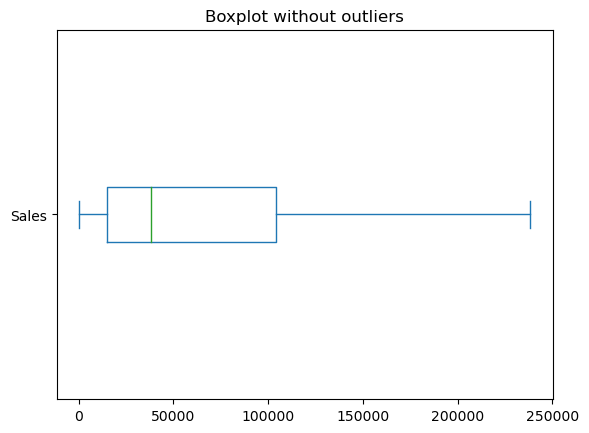

In [20]:
boxplot = df["Sales"].plot(kind="box",vert=False,title="Boxplot without outliers")

In [21]:
df.head()

,Region,Product,Subsidiary,Stores,Sales,Inventory,Returns
0,Africa,Boot,Addis Ababa,12,29761.0,191821,769
1,Africa,Men's Casual,Addis Ababa,4,67242.0,118036,2284
2,Africa,Men's Dress,Addis Ababa,7,76793.0,136273,2433
3,Africa,Sandal,Addis Ababa,10,62819.0,204284,1861
4,Africa,Slipper,Addis Ababa,14,68641.0,279795,1771


In [22]:
Q1 = np.percentile(df["Returns"],25)
Q3 = np.percentile(df["Returns"],75)
IQR = Q3 - Q1
print(IQR)

2863.5


In [23]:
UW = (1.5*IQR) + Q3
UW

7733.75

In [24]:
print("No of outliers are:",len(df[df["Returns"]>UW]))

No of outliers are: 33


In [25]:
#Replacing outliers with nearest whisker values
df["Returns"][df["Returns"]>UW] = UW

C:\Users\padal\AppData\Local\Temp\ipykernel_25308\3508855090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Returns"][df["Returns"]>UW] = UW


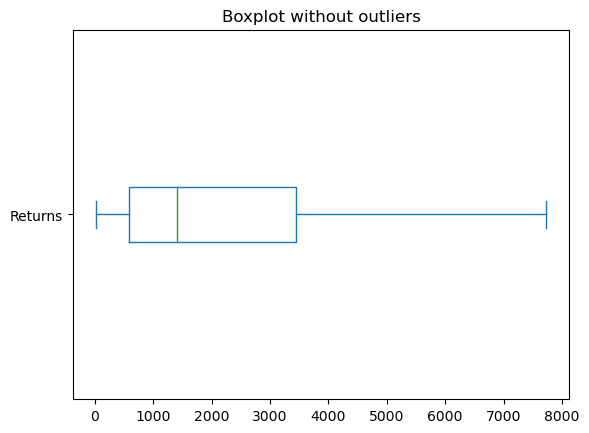

In [26]:
boxplot = df["Returns"].plot(kind="box",vert=False,title="Boxplot without outliers")